In [65]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
carbon=pd.read_csv('carbon_emmission.csv')
tem=pd.read_csv('temperature.csv')

In [67]:
carbon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ObjectId  1570 non-null   int64  
 1   Country   1570 non-null   object 
 2   Date      1570 non-null   object 
 3   Value     1570 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 49.2+ KB


In [68]:
carbon.head()

,ObjectId,Country,Date,Value
0,1,World,1958M03,315.70
1,2,World,1958M04,317.45
2,3,World,1958M05,317.51
3,4,World,1958M06,317.24
4,5,World,1958M07,315.86


In [69]:
tem.head()

,ObjectId,Country,ISO2,ISO3,F1961,F1962,F1963,F1964,F1965,F1966,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,-0.113,-0.164,0.847,-0.764,-0.244,0.226,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,0.627,0.326,0.075,-0.166,-0.388,0.559,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,0.164,0.114,0.077,0.250,-0.100,0.433,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,0.079,-0.042,0.169,-0.140,-0.562,0.181,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,0.736,0.112,-0.752,0.308,-0.490,0.415,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [70]:
carbon.drop(columns=['ObjectId','Country'],inplace=True)
tem.drop(columns='ObjectId',inplace=True)

In [71]:
carbon['Date']=carbon['Date'].str.replace('M','/')
carbon['Date']=pd.to_datetime(carbon['Date'])

C:\Users\Alisina Nazari\AppData\Local\Temp\ipykernel_10992\2745015425.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



**Calculateing key statistics for temperature changes and CO₂ concentrations, such as mean, median, and variance**

In [72]:
co2=carbon.groupby(carbon['Date'].dt.year)['Value'].agg(['mean','median','var']).reset_index()

In [73]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=co2['Date'],y=co2['mean'],name='Average',yaxis='y1'))
fig.add_trace(go.Scatter(x=co2['Date'],y=co2['median'],name='median',yaxis='y2'))
fig.update_layout(title='Average and median carbon emissions over different years',
                  yaxis1=dict(title='average',titlefont=dict(color='black'),tickfont=dict(color='red')),
                  yaxis2=dict(title='median',titlefont=dict(color='black'),tickfont=dict(color='red'),overlaying='y',side='right'),
                  legend=dict(x=0.85,y=1.2)
                  )
fig.show()

In [74]:
monthly_carbon=carbon.groupby(carbon['Date'].dt.month_name())['Value'].mean().reset_index()
monthtrend=['January','February','March','April','May','June','July','August','October','September','November','December']
monthly_carbon['Date']=pd.Categorical(values=monthly_carbon['Date'],categories=monthtrend,ordered=True)
monthly_carbon.sort_values(by='Date',inplace=True)
fig=px.line(data_frame=monthly_carbon,x='Date',y='Value',markers='.')
fig.update_layout(title='Seasonal Variations in CO₂ Concentrations',xaxis=dict(title='Months'),yaxis=dict(title='CO₂ Concentration (ppm)'))
fig.show()

**The above graph highlights the seasonal fluctuations in CO₂ concentrations, which peak during late spring and early summer (around May) and reach the lowest levels in fall (around September).**

In [75]:
tem[['mean','median','var']]=tem.loc[0:,'F1961':].agg(['mean','median','var'],axis=1)
tem2=tem.sort_values(by='mean',ascending=False).head(10).reset_index()

In [76]:
fig=go.Figure()
fig.add_trace(go.Bar(x=tem2['Country'],y=tem2['mean'],name='Average',yaxis='y1'))
fig.add_trace(go.Bar(x=tem2['Country'],y=tem2['median'],name='median',yaxis='y2'))
fig.update_layout(title='Average and median temperature by Country',
                  yaxis1=dict(title='average',titlefont=dict(color='black'),tickfont=dict(color='red')),
                  yaxis2=dict(title='median',titlefont=dict(color='black'),tickfont=dict(color='red'),overlaying='y',side='right'),
                  legend=dict(x=0.85,y=1.2)
                  )
fig.show()

In [77]:
carbon_emissions=carbon['Value'].agg(['mean','median','var']).reset_index()
carbon_emissions.columns=['Statistics','carbon_value']

In [78]:
carbon_emissions

,Statistics,carbon_value
0,mean,180.716153
1,median,313.835000
2,var,32600.002005


In [79]:
tem_data=tem.loc[0:,'F1961':'F2022']
tem_mean=tem_data.values.flatten().mean()

In [80]:
numeric_columns = tem.loc[:, 'F1961':'F2022']

overall_mean = np.nanmean(numeric_columns.values.flatten())

overall_median = np.nanmedian(numeric_columns.values.flatten())

overall_variance = np.nanvar(numeric_columns.values.flatten())

tempertures=pd.Series([overall_mean,overall_median,overall_variance]).reset_index()
tempertures.columns=['Statistics','values']

tempertures['Statistics'].replace({0:'mean',1:'median',2:'variance'},inplace=True)
tempertures

C:\Users\Alisina Nazari\AppData\Local\Temp\ipykernel_10992\565946507.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Statistics,values
0,mean,0.537771
1,median,0.470000
2,variance,0.429418


The mean temperature change is approximately 0.54°C, with a median of 0.47°C and a variance of 0.43,
indicating slight variability in temperature anomalies. For CO₂ concentrations, the mean is 180.72 ppm,
 the median is significantly higher at 313.84 ppm, and the variance is 32,600, which reflects substantial variability in CO₂ levels over the dataset’s timeframe.
 This highlights the stronger fluctuation in CO₂ data compared to temperature changes **bold text**

In [81]:
temperature_years=[]
for col in tem.columns[3:222]:
  name=col
  d=tem[col].mean()
  temperature_years.append([name,d])
temperature_data=pd.DataFrame(temperature_years)
temperature_data.columns=['year','temp_mean']
temperature_data.drop(axis=0,index=[62,63,64],inplace=True)
temperature_data['year']=temperature_data['year'].str.replace('F','').str.strip().astype('int')
temperature_data

,year,temp_mean
0,1961,0.163053
1,1962,-0.013476
2,1963,-0.006043
3,1964,-0.070059
4,1965,-0.247027
...,...,...
57,2018,1.302113
58,2019,1.443061
59,2020,1.552038
60,2021,1.343531


In [82]:
carbon_o2=carbon.groupby(carbon['Date'].dt.year)['Value'].mean().reset_index()
carbon_o2.columns=['year','carbon_mean']
carbon_o2

,year,carbon_mean
0,1958,315.232000
1,1959,172.460455
2,1960,158.601667
3,1961,158.938333
4,1962,159.355000
...,...,...
62,2020,207.416667
63,2021,208.472083
64,2022,209.518333
65,2023,210.844167


In [83]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=temperature_data['year'],y=temperature_data['temp_mean'],mode='lines+markers',yaxis='y1',name='temperature'))
fig.add_trace(go.Scatter(x=carbon_o2['year'],y=carbon_o2['carbon_mean'],mode='lines+markers',yaxis='y2',name='Co2'))
fig.update_layout(title="Time-series of Temperature Change and CO₂ Concentrations", yaxis1=dict(title='temperature'),
yaxis2=dict(title='Co2',overlaying='y',side='right'),
legend=dict(x=1,y=1.11),
                  height=700,
                  width=900
                  )

fig.show()

The time-series graph shows a consistent increase in CO₂ concentrations (measured in ppm) over the years, which indicates the accumulation of greenhouse gases in the atmosphere. Simultaneously, a slight upward trend in global temperature change suggests that rising CO₂ levels are associated with global warming. The temporal alignment supports the hypothesis of CO₂’s significant contribution to temperature increase.

**bold text**

In [84]:
Merged_data=pd.merge(left=temperature_data,right=carbon_o2,how='right',on='year')
Merged_data.dropna(axis=0,how='any',inplace=True)
Merged_data

,year,temp_mean,carbon_mean
3,1961,0.163053,158.938333
4,1962,-0.013476,159.355000
5,1963,-0.006043,159.580417
6,1964,-0.070059,159.905833
7,1965,-0.247027,160.083333
...,...,...,...
60,2018,1.302113,204.598750
61,2019,1.443061,206.183333
62,2020,1.552038,207.416667
63,2021,1.343531,208.472083


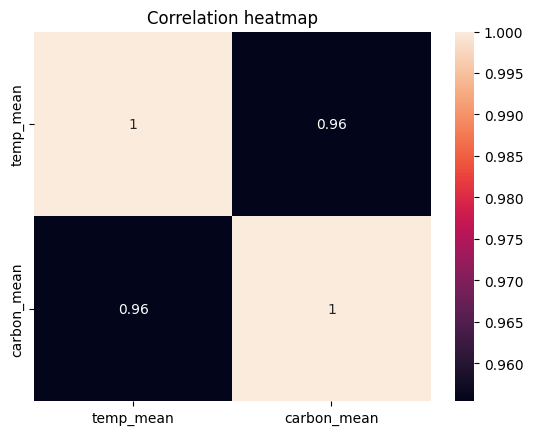

In [85]:
sns.heatmap(data=Merged_data[['temp_mean','carbon_mean']].corr(),annot=True)
plt.title("Correlation heatmap")
plt.show()

The heatmap reveals a strong positive correlation (0.96) between CO₂ concentrations and temperature changes. This statistical relationship reinforces the observation that higher CO₂ levels are closely linked with increasing global temperatures, which highlights the importance of addressing carbon emissions to mitigate climate change.

**bold text**

In [86]:
fig=px.scatter(data_frame=Merged_data,x='temp_mean',y='carbon_mean')
fig.update_layout(title='Temperature Change vs CO₂ Concentration',xaxis_title='Temperature Change',yaxis_title='CO₂ Concentration (ppm)',width=700)
fig.show()

The scatter plot shows a clear linear trend, where higher CO₂ concentrations correspond to greater temperature changes. This visual evidence underscores the direct relationship between CO₂ emissions and global warming, which provides further support for policies targeting reductions in carbon emissions to combat climate impacts.

**bold text**

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

scaler=StandardScaler()
LinearRegress=Merged_data
LinearRegress[['carbon_mean_scale', 'temp_mean_scale']]= scaler.fit_transform(LinearRegress[['carbon_mean', 'temp_mean']])

y = LinearRegress[['carbon_mean_scale', 'temp_mean_scale']]
x = LinearRegress[['year']]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)


model = LinearRegression()
model.fit(x_train, y_train)

s = model.score(x_test, y_test)
print(f"R-squared Score: {s:.4f}")

slopes = model.coef_
intercepts = model.intercept_


carbon_slope = slopes[0, 0]
temp_slope = slopes[1, 0]

carbon_intercept = intercepts[0]
temp_intercept = intercepts[1]

LinearRegress['carbon_trend_line'] = carbon_slope * LinearRegress['year'] + carbon_intercept
LinearRegress['temp_trend_line'] = temp_slope * LinearRegress['year'] + temp_intercept



print(f"Carbon Mean: Slope = {carbon_slope:.5f}, Intercept = {carbon_intercept:.5f}")
print(f"Temp Mean: Slope = {temp_slope:.5f}, Intercept = {temp_intercept:.5f}")


R-squared Score: 0.8933
Carbon Mean: Slope = 0.05529, Intercept = -110.11782
Temp Mean: Slope = 0.05522, Intercept = -109.99554


In [88]:
LinearRegress

,year,temp_mean,carbon_mean,carbon_mean_scale,temp_mean_scale,carbon_trend_line,temp_trend_line
3,1961,0.163053,158.938333,-1.408843,-0.701450,-1.701430,-1.716589
4,1962,-0.013476,159.355000,-1.381033,-1.054965,-1.646144,-1.661373
5,1963,-0.006043,159.580417,-1.365988,-1.040078,-1.590857,-1.606156
6,1964,-0.070059,159.905833,-1.344269,-1.168275,-1.535571,-1.550940
7,1965,-0.247027,160.083333,-1.332422,-1.522669,-1.480285,-1.495724
...,...,...,...,...,...,...,...
60,2018,1.302113,204.598750,1.638651,1.579611,1.449888,1.430734
61,2019,1.443061,206.183333,1.744410,1.861872,1.505174,1.485950
62,2020,1.552038,207.416667,1.826725,2.080107,1.560460,1.541166
63,2021,1.343531,208.472083,1.897167,1.662554,1.615747,1.596383


**Plotting charts for trend lines for all data**

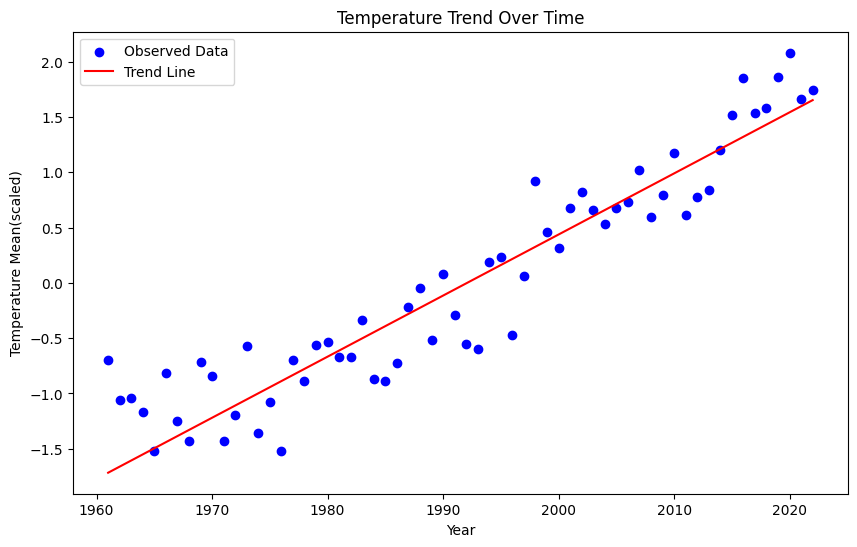

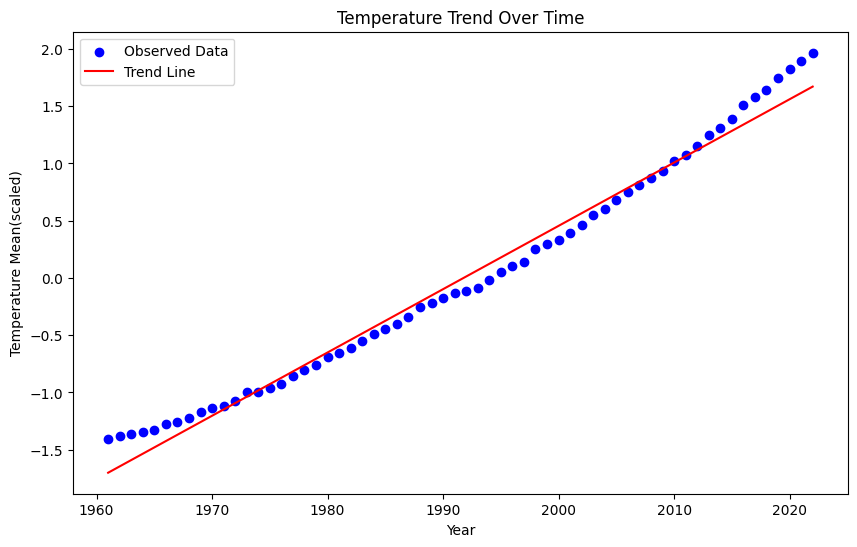

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(LinearRegress['year'], LinearRegress['temp_mean_scale'], label='Observed Data', color='blue')
plt.plot(LinearRegress['year'], LinearRegress['temp_trend_line'],label='Trend Line', color='red')
plt.xlabel('Year')
plt.ylabel('Temperature Mean(scaled)')
plt.title('Temperature Trend Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(LinearRegress['year'], LinearRegress['carbon_mean_scale'], label='Observed Data', color='blue')
plt.plot(LinearRegress['year'], LinearRegress['carbon_trend_line'], label='Trend Line', color='red')
plt.xlabel('Year')
plt.ylabel('Temperature Mean(scaled)')
plt.title('Temperature Trend Over Time')
plt.legend()
plt.show()

In [92]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=LinearRegress['year'],y=LinearRegress['carbon_mean_scale'],mode='lines+markers', name="CO₂ Concentration (ppm)",yaxis='y1'))
fig.add_trace(go.Scatter(x=LinearRegress['year'],y=LinearRegress['carbon_trend_line'], mode='lines', name="CO₂ Trend",line=dict(dash='dash'),yaxis='y1'))
fig.add_trace(go.Scatter(x=LinearRegress['year'],y=LinearRegress['temp_mean_scale'],mode='lines+markers', name="Temperature Change (°C)",yaxis='y2'))
fig.add_trace(go.Scatter(x=LinearRegress['year'],y=LinearRegress['temp_trend_line'],mode='lines', name="Temperature Trend", line=dict(dash='dash'),yaxis='y2'))
fig.update_layout(
    title="Trends in Temperature Change and CO₂ Concentrations",
    xaxis_title="Year",
    yaxis_title="CO₂ Concentration (ppm)[Scaled]",
    yaxis2=dict(title='Temperature Change (°C)[Scaled]',overlaying='y',side='right'),
    template="plotly_white",
    legend_title="Metrics",
    legend=dict(x=0.85,y=1.3)
)
fig.show()

In [93]:
from sklearn.cluster import KMeans

clustering_data = Merged_data

Model1 = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = Model1.fit_predict(clustering_data[["temp_mean", "carbon_mean"]])

def cluss(x):
  if x==0:
    return 'Moderate Temp & CO₂'
  elif x==1:
    return 'High Temp & CO₂'
  else:
    return 'Low Temp & CO₂'


clustering_data['Label']=clustering_data['Cluster'].apply(cluss)

In [95]:
clustering_data

,year,temp_mean,carbon_mean,carbon_mean_scale,temp_mean_scale,carbon_trend_line,temp_trend_line,Cluster,Label
3,1961,0.163053,158.938333,-1.408843,-0.701450,-1.701430,-1.716589,2,Low Temp & CO₂
4,1962,-0.013476,159.355000,-1.381033,-1.054965,-1.646144,-1.661373,2,Low Temp & CO₂
5,1963,-0.006043,159.580417,-1.365988,-1.040078,-1.590857,-1.606156,2,Low Temp & CO₂
6,1964,-0.070059,159.905833,-1.344269,-1.168275,-1.535571,-1.550940,2,Low Temp & CO₂
7,1965,-0.247027,160.083333,-1.332422,-1.522669,-1.480285,-1.495724,2,Low Temp & CO₂
...,...,...,...,...,...,...,...,...,...
60,2018,1.302113,204.598750,1.638651,1.579611,1.449888,1.430734,1,High Temp & CO₂
61,2019,1.443061,206.183333,1.744410,1.861872,1.505174,1.485950,1,High Temp & CO₂
62,2020,1.552038,207.416667,1.826725,2.080107,1.560460,1.541166,1,High Temp & CO₂
63,2021,1.343531,208.472083,1.897167,1.662554,1.615747,1.596383,1,High Temp & CO₂


Clustering Climate Patterns
**bold text**

In [96]:
fig=px.scatter(data_frame=clustering_data,x='carbon_mean',y='temp_mean',color='Label')
fig.update_layout(title='Clustering of Years Based on Climate Patterns',xaxis=dict(title='CO₂ Concentration'),yaxis=dict(title='Temperature Change'),legend=dict(title='Climate Pattern',x=0.85,y=1.3))
fig.show()

**The progression from green to orange and then to blue clusters reflects a clear trend of increasing temperature change corresponding to rising CO₂ levels, effectively illustrating the correlation between greenhouse gas concentrations and global temperature variations.**